In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd 
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
X,y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

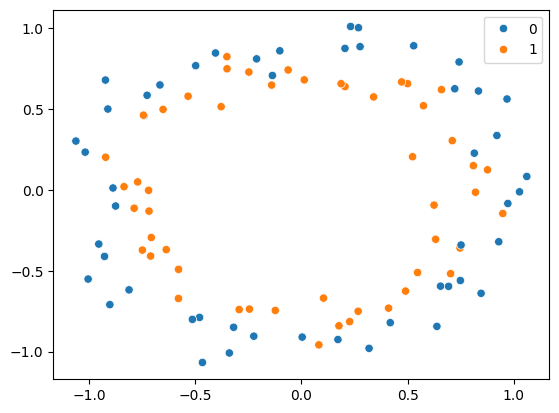

In [4]:
sns.scatterplot(x=X[:,0], y = X[:,1], hue=y)

In [5]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=1 )

In [9]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500 ,verbose=0)

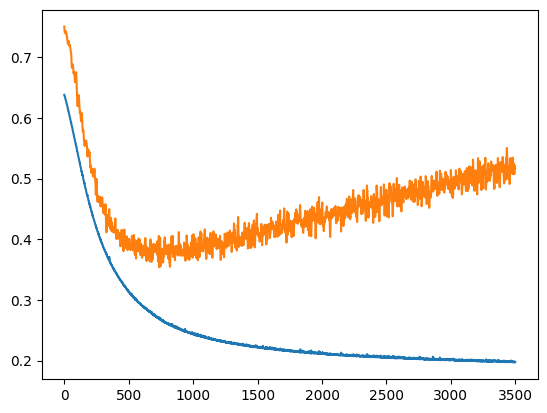

In [14]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()


9600/9600 [==============================] - 27s 3ms/step


<Axes: >

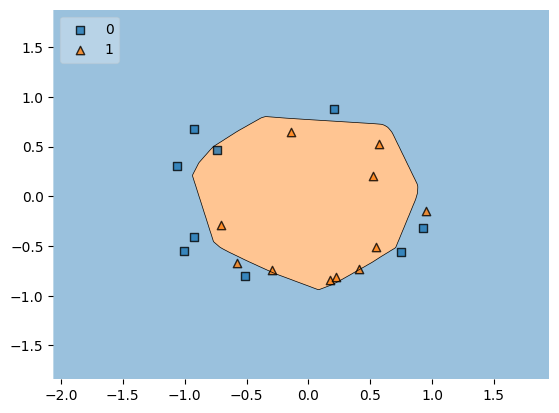

In [15]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)

# Early Stopping 

In [10]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta = 0.00001, 
    patience=20, 
    verbose=1,
    mode = 'auto',
    baseline= None,
    restore_best_weights = False
)

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks =callback)

Epoch 1/3500
3/3 [==============================] - 1s 186ms/step - loss: 0.7007 - accuracy: 0.5000 - val_loss: 0.7022 - val_accuracy: 0.4500
Epoch 2/3500
3/3 [==============================] - 0s 40ms/step - loss: 0.6969 - accuracy: 0.4875 - val_loss: 0.7076 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 40ms/step - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.7104 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 41ms/step - loss: 0.6919 - accuracy: 0.5250 - val_loss: 0.7140 - val_accuracy: 0.2500
Epoch 5/3500
3/3 [==============================] - 0s 38ms/step - loss: 0.6893 - accuracy: 0.5500 - val_loss: 0.7183 - val_accuracy: 0.3000
Epoch 6/3500
3/3 [==============================] - 0s 38ms/step - loss: 0.6880 - accuracy: 0.5750 - val_loss: 0.7221 - val_accuracy: 0.2500
Epoch 7/3500
3/3 [==============================] - 0s 36ms/step - loss: 0.6868 - accuracy: 0.5625 - val_loss: 0.7255 - val_accuracy: 0.2500
Epoch 8/3500

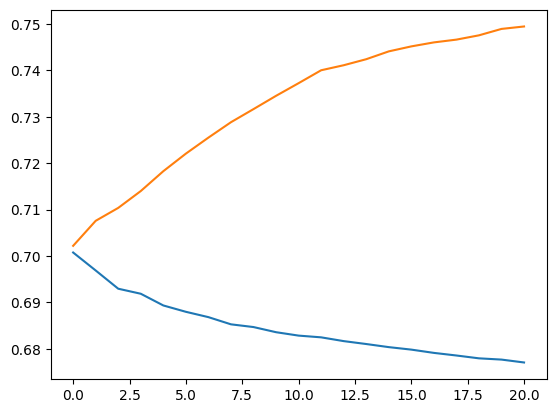

In [14]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.show()